In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
import os
import io
from PIL import Image

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#import tflite_runtime.interpreter as tflite
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model

In [2]:
img_height = 256
img_width = 256
class_folder_paths = ['C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/'+x for x in os.listdir('C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/')]
class_folder_paths

['C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Afghan',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/African Wild Dog',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Airedale',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/American Hairless',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/American Spaniel',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Basenji',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Basset',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Beagle',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bearded Collie',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bermaise',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bichon Frise',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Blenheim',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bloodhound',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/B

In [3]:
for class_folder_path in class_folder_paths:
    print('{0}:'.format(class_folder_path), ' ', len(os.listdir(class_folder_path)))

C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Afghan:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/African Wild Dog:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Airedale:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/American Hairless:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/American Spaniel:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Basenji:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Basset:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Beagle:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bearded Collie:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bermaise:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bichon Frise:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Blenheim:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bloodhound:   10
C:/Users/krzys/Desktop/Polibuda/se

In [4]:
TRAIN_DIR = 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/train/'
# TRAIN_DIR = 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/train2/'
VAL_DIR = 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/'

In [5]:
train_data_gen = ImageDataGenerator(horizontal_flip = True,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2)

train_generator = train_data_gen.flow_from_directory(TRAIN_DIR,
                                                     target_size = (224, 224),
                                                     color_mode = 'rgb',
                                                     batch_size = 32,
                                                     class_mode ='categorical',
                                                     shuffle = True)

val_data_gen = ImageDataGenerator()

val_generator = val_data_gen.flow_from_directory(VAL_DIR,
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = False)

labels = train_generator.class_indices
class_mapping = dict((v,k) for k,v in labels.items())
class_mapping
# *labels2, = labels.values()

before_mobilenet = Sequential([Input((224,224,3)),
                             Lambda(preprocess_input)])

mobilenet = MobileNetV2(input_shape = (224,224,3), include_top = False)

after_mobilenet = Sequential([GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(70, activation = 'softmax')])

model = Sequential([before_mobilenet, mobilenet, after_mobilenet])

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


In [6]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
model.build(((None, 224, 224, 3)))
before_mobilenet.summary()
mobilenet.summary()
after_mobilenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         

In [ ]:
train_cb = ModelCheckpoint('./model/', save_best_only = True)

model.fit(train_generator, validation_data = val_generator, callbacks = [train_cb], epochs = 20)

Epoch 1/20


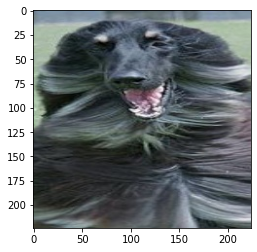

In [74]:
#inp1 = cv2.imread('C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/valid/Afghan/01.jpg') #Afghan
#inp2 = cv2.imread('C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/valid/Boxer/01.jpg') #Boxer
#inp3 = cv2.imread('C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/valid/Bull Mastiff/01.jpg')
#inputs = [inp1, inp2, inp3]
#inputs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in inputs]
#plt.imshow(inputs[0])


In [7]:
data_dir = 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/'
val_dir = 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/'


train_dir=os.path.join(data_dir, 'train')
# train_dir=os.path.join(data_dir, 'train2')
val_dir=os.path.join(val_dir, 'test')

In [35]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  image_size=(img_height, img_width),
  batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  image_size=(img_height, img_width),
  batch_size=32)

Found 15856 files belonging to 4 classes.
Found 700 files belonging to 70 classes.


In [ ]:
#Tworzenie zbiorów obrazów do treningu i walidacji
train_ds = tf.keras.preprocessing.image_dataset_from_directory( train_dir, labels='inferred', label_mode='int', image_size=(img_height, img_width), batch_size=32)
val_ds = tf.keras.preprocessing.image_dataset_from_directory( val_dir, labels='inferred', label_mode='int', image_size=(img_height, img_width), batch_size=32)

In [24]:
#Tworzenie zbiorów obrazów do treningu i walidacji
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir)

Found 15856 files belonging to 4 classes.
Found 700 files belonging to 70 classes.


In [36]:
#Pokazanie części obrazów, aby sprawdzić czy się załadowały
plt.figure(figsize=(100, 100))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_mapping)
    plt.axis("off")

In [22]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break



AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


normalization_layer = layers.Rescaling(1./255)


NameError: name 'train_ds' is not defined

In [40]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

InvalidArgumentError: Input is empty.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext]

In [23]:
num_classes = len(class_mapping)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [197]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2_input (InputLay  [(None, 256, 256, 3)]    0         
 er)                                                             
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0     

In [42]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10


InvalidArgumentError: Graph execution error:

2 root error(s) found.
  (0) INVALID_ARGUMENT:  Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_4]]
  (1) INVALID_ARGUMENT:  Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_2786]

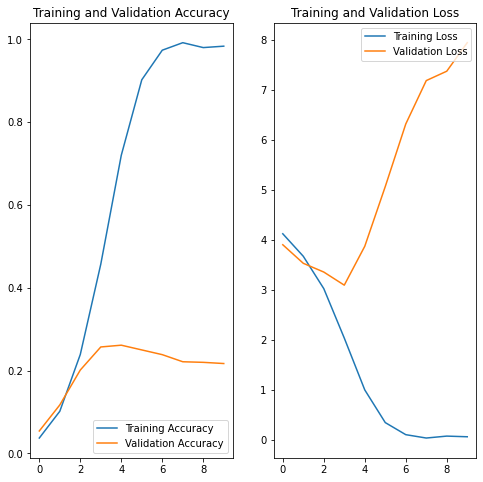

In [109]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


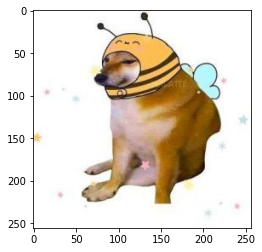

In [5]:
img_path = "D:/PENDRIVE/CV/dog3.jpg"
img = Image.open(img_path)
plt.imshow(img)
plt.show()


img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)


#img = tf.keras.utils.load_img(

#    sunflower_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

In [ ]:
print(format(class_mapping[np.arg(score[0])], 100 * score[0]))
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_mapping[np.argmax(score)], 100 * np.max(score))
)
#print(decode_predictions(predictions, top=3)[0])

In [1]:
#model = tf.keras.applications.resnet50.ResNet50()
#model = first_model
predictions = model.predict(img_preprocessed)

NameError: name 'model' is not defined

In [2]:
print(decode_predictions(predictions, top=3)[0])

NameError: name 'decode_predictions' is not defined

In [212]:
print(predictions)

[[0.01424756 0.01434243 0.01424494 0.01419811 0.01415562 0.01439587
  0.01431821 0.01425583 0.01432656 0.01441708 0.01431321 0.01430551
  0.01446775 0.0142621  0.01431261 0.01416312 0.01424423 0.0142956
  0.01437624 0.01418139 0.01422968 0.01422747 0.01441212 0.01417993
  0.01419716 0.01439773 0.01418689 0.01426583 0.01416699 0.01442998
  0.01419378 0.01435851 0.01423814 0.01432244 0.01435048 0.01426188
  0.01421596 0.01434772 0.01422517 0.01432604 0.01430691 0.01423004
  0.01424786 0.01430236 0.0142754  0.01423343 0.01426638 0.01425617
  0.01428431 0.01429659 0.01439796 0.01422972 0.01420882 0.01440138
  0.01419575 0.01418836 0.0143798  0.01428854 0.01434841 0.01424428
  0.01433734 0.01435934 0.0143655  0.01441611 0.0144079  0.01423133
  0.01423263 0.01427699 0.01416268 0.01426993]]


In [24]:
first_model = model

NameError: name 'model' is not defined

In [10]:
base_model = modelmodel
# add a global spatial average pooling layer
x = base_model.output
#x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 7 classes
predictions = Dense(70, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [4]:
modelmodel = tf.keras.models.load_model('C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/model')
modelmodel.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)      

In [43]:
tf.math.confusion_matrix(
    labels,
    predictions,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

NameError: name 'predictions' is not defined

In [12]:
y=[]
for i in 70:
    y.append(1)

TypeError: 'int' object is not iterable

In [20]:

confusion = tf.math.confusion_matrix(labels=labels2, predictions=predictions)
print(confusion)

ValueError: Exception encountered when calling layer "tf.math.confusion_matrix_1" (type TFOpLambda).

Shapes must be equal rank, but are 1 and 2
	From merging shape 0 with other shapes. for '{{node tf.math.confusion_matrix_1/confusion_matrix/stack_1}} = Pack[N=2, T=DT_INT64, axis=1](tf.math.confusion_matrix_1/confusion_matrix/control_dependency, tf.math.confusion_matrix_1/confusion_matrix/control_dependency_1)' with input shapes: [70], [?,70].

Call arguments received by layer "tf.math.confusion_matrix_1" (type TFOpLambda):
  • labels=['tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)']
  • predictions=tf.Tensor(shape=(None, 70), dtype=float32)
  • num_classes=None
  • weights=None
  • dtype=<dtype: 'int32'>
  • name=None